In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
print("imports done")

imports done


# Imports

In [2]:
thousandg = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/reference/1000g_HJ/eur_allele_freq_1000g.frq", sep='\s+')

In [12]:
freq = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/alle_freq_annot_fixed.frq", sep='\s+')

In [13]:
freq_dotrevive = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/alle_freq_annot_dotrevive_fixed.frq", sep='\s+')

In [42]:
filtered_freq = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/allel_freq_filtered_annot_fixed.frq", sep='\s+')

In [43]:
filtered_freq_dotrevive = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/allel_freq_filtered_annot_dotrevive_fixed.frq", sep='\s+')

In [4]:
lax_filter_freq = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/allel_freq_filtered_adjusted_fixed.frq", sep='\s+')

In [3]:
# Directory containing the files
directory = "/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/filter_comparison/fixed_freq/"

# List all files in the directory
files = os.listdir(directory)

# Filter out only the .frq files
frq_files = [file for file in files if file.endswith(".frq")]

# Loop through each file and load into a uniquely named dataframe
dataframes = {}
for file in frq_files:
    # Generate a unique dataframe name based on the file name
    dataframe_name = os.path.splitext(os.path.splitext(file)[0])[0]  # Remove the last extension
    dataframe_name = dataframe_name.replace("_output", "")  # Remove '_output' part
    dataframe_name = dataframe_name.replace(".vcf", "")  # Remove '.vcf' part
    # Read the file into a dataframe
    file_path = os.path.join(directory, file)
    dataframes[dataframe_name] = pd.read_csv(file_path, sep='\s+')

In [5]:
# Directory containing the files
directory_miss = "/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/filter_comparison/missing/"

# List all files in the directory
files_miss = os.listdir(directory_miss)

# Filter out only the .frq files
smiss_files = [file for file in files_miss if file.endswith(".smiss")]

# Loop through each file and load into a uniquely named dataframe
dataframes_smiss = {}
for file in smiss_files:
    # Read the file into a dataframe
    file_path = os.path.join(directory_miss, file)
    dataframes_smiss[dataframe_name] = pd.read_csv(file_path, sep='\s+')

In [10]:
print(dataframes.keys())

dict_keys(['maf_0.001', 'dp_4', 'cr_0.5', 'dp_5', 'dp_3', 'dp_10', 'cr_0.2', 'maf_0.004', 'cr_0.1', 'dp_2', 'dp_7', 'maf_0.01', 'maf_0.009', 'maf_0.007', 'dp_9', 'cr_0.7', 'cr_1.0', 'maf_0.006', 'dp_8', 'maf_0.003', 'dp_1', 'dp_6', 'cr_0.8', 'cr_0.4', 'cr_0.6', 'cr_0.3', 'maf_0.008', 'maf_0.002', 'cr_0.9', 'maf_0.005'])


In [6]:
print(dataframes_smiss.keys())

dict_keys(['cr_0.5.gz-filtered'])


In [15]:
freq.head(5)

,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,1:12565:GCT:G,G,GCT,0.005,400
1,1,1:12585:C:A,A,C,0.005,400
2,1,1:12948:T:C,C,T,0.005,400
3,1,1:13115:GT:G,G,GT,0.005,400
4,1,1:13118:A:G,G,A,0.005,400


In [16]:
freq_dotrevive.head(5)

,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,1:12565:GCT:G,G,GCT,0.5,4
1,1,1:12585:C:A,A,C,0.5,4
2,1,1:12948:T:C,T,C,0.0,2
3,1,1:13115:GT:G,G,GT,0.5,4
4,1,1:13118:A:G,G,A,0.5,4


In [17]:
thousandg.head(5)

,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,1:10390:CCCCTAACCC:C,C,CCCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA,0.015900,1006
1,1,1:10399:C:A,A,C,0.000000,1006
2,1,1:10398:C:CCCCTAA,CCCCTAA,C,0.005964,1006
3,1,1:10397:CCCCTAA:C,C,CCCCTAA,0.018890,1006
4,1,1:10403:A:ACCCTAACCC,ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC,A,0.004970,1006


# Merging

In [22]:
merged_df = pd.merge(thousandg, freq, on=['CHR', 'SNP'], suffixes=('_MAF1', '_MAF2'))

In [23]:
merged_df_fixed = pd.merge(thousandg, freq_dotrevive, on=['CHR', 'SNP'], suffixes=('_MAF1', '_MAF2'))

In [48]:
merged_df_filtered = pd.merge(thousandg, filtered_freq, on=['CHR', 'SNP'], suffixes=('_MAF1', '_MAF2'))

In [44]:
merged_df_filtered_fixed = pd.merge(thousandg, filtered_freq_dotrevive, on=['CHR', 'SNP'], suffixes=('_MAF1', '_MAF2'))

In [5]:
merged_df_lax = pd.merge(thousandg, lax_filter_freq, on=['CHR', 'SNP'], suffixes=('_MAF1', '_MAF2'))

In [7]:
# Dictionary to hold merged dataframes
merged_dataframes = {}

# Perform merge for each dataframe in the dataframes dictionary
for name, df in dataframes.items():
    merged_df = pd.merge(thousandg, df, on=['CHR', 'SNP'], suffixes=('_MAF1', '_MAF2'))
    merged_dataframes[name] = merged_df
    
merged_df.head(3)

,CHR,SNP,A1_MAF1,A2_MAF1,MAF_MAF1,NCHROBS_MAF1,POS_MAF1,A1_MAF2,A2_MAF2,MAF_MAF2,NCHROBS_MAF2,POS_MAF2
0,1,1:14671:G:C,C,G,0.009940,1006,1:14671,C,G,0.007653,392,1:14671
1,1,1:14775:C:T,T,C,0.000994,1006,1:14775,T,C,0.007500,400,1:14775
2,1,1:16226:AG:A,A,AG,0.010930,1006,1:16226,A,AG,0.005495,364,1:16226


In [6]:
# Function to extract the first part of the SNP
def extract_pos(snp):
    if pd.isna(snp):  # Check for missing values
        return snp
    parts = snp.split(':')
    if len(parts) >= 2:  # Check if SNP has at least two parts separated by ':'
        return ':'.join(parts[:2])  # Return only the first two parts (before the second colon)
    else:
        return snp  # If SNP has less than two parts, return it as is


# Dictionary to hold merged dataframes
merged_dataframes_pos = {}

# Perform merge for each dataframe in the dataframes dictionary
for name, df in dataframes.items():
    # Apply function to extract the first part of the SNP column
    thousandg['POS'] = thousandg['SNP'].apply(extract_pos)
    df['POS'] = df['SNP'].apply(extract_pos)
    
    # Merge dataframes
    merged_df_pos = pd.merge(thousandg, df, on=['POS'], suffixes=('_MAF1', '_MAF2'))
    merged_dataframes_pos[name] = merged_df_pos

merged_df_pos.head(3)

,CHR_MAF1,SNP_MAF1,A1_MAF1,A2_MAF1,MAF_MAF1,NCHROBS_MAF1,POS,CHR_MAF2,SNP_MAF2,A1_MAF2,A2_MAF2,MAF_MAF2,NCHROBS_MAF2
0,1,1:14671:G:C,C,G,0.009940,1006,1:14671,1,1:14671:G:C,C,G,0.007653,392
1,1,1:14775:C:T,T,C,0.000994,1006,1:14775,1,1:14775:C:T,T,C,0.007500,400
2,1,1:16226:AG:A,A,AG,0.010930,1006,1:16226,1,1:16226:AG:A,A,AG,0.005495,364


# Plotting

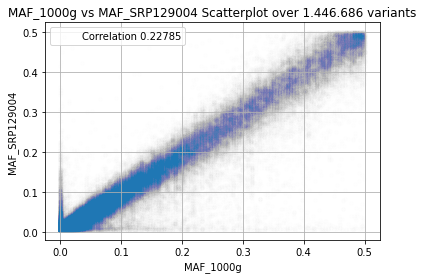

In [21]:
fig = plt.figure(facecolor='white')
plt.scatter(merged_df['MAF_MAF1'], merged_df['MAF_MAF2'], alpha=0.005, s=15)
plt.xlabel('MAF_1000g')
plt.ylabel('MAF_SRP129004')
plt.title('MAF_1000g vs MAF_SRP129004 Scatterplot over 1.446.686 variants')
plt.legend(['Correlation 0.22785'], loc='upper left')
plt.grid(True)
plt.show()

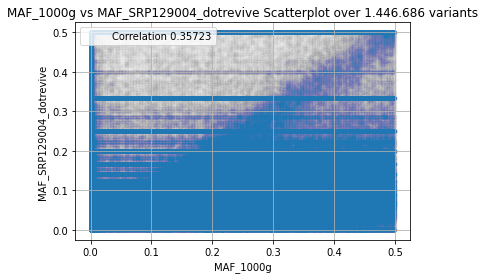

In [67]:
fig = plt.figure(facecolor='white')
plt.scatter(merged_df_fixed['MAF_MAF1'], merged_df_fixed['MAF_MAF2'], alpha=0.005, s=15)
plt.xlabel('MAF_1000g')
plt.ylabel('MAF_SRP129004_dotrevive')
plt.title('MAF_1000g vs MAF_SRP129004_dotrevive Scatterplot over 1.446.686 variants')
plt.legend(['Correlation 0.35723'], loc='upper left')
plt.grid(True)
plt.show()

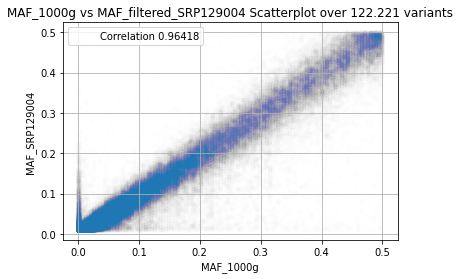

In [68]:
fig = plt.figure(facecolor='white')
plt.scatter(merged_df_filtered['MAF_MAF1'], merged_df_filtered['MAF_MAF2'], alpha=0.005, s=15)
plt.xlabel('MAF_1000g')
plt.ylabel('MAF_SRP129004')
plt.title('MAF_1000g vs MAF_filtered_SRP129004 Scatterplot over 122.221 variants')
plt.legend(['Correlation 0.96418'], loc='upper left')
plt.grid(True)
plt.show()


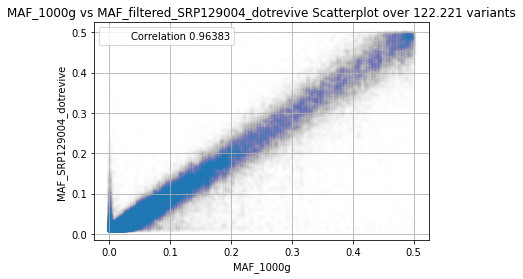

In [70]:
fig = plt.figure(facecolor='white')
plt.scatter(merged_df_filtered_fixed['MAF_MAF1'], merged_df_filtered_fixed['MAF_MAF2'], alpha=0.005, s=15)
plt.xlabel('MAF_1000g')
plt.ylabel('MAF_SRP129004_dotrevive')
plt.title('MAF_1000g vs MAF_filtered_SRP129004_dotrevive Scatterplot over 122.221 variants')
plt.legend(['Correlation 0.96383'], loc='upper left')
plt.grid(True)
plt.show()

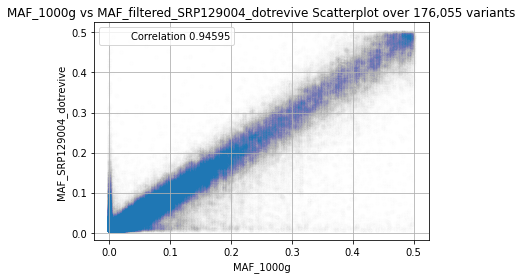

In [15]:
fig = plt.figure(facecolor='white')
plt.scatter(merged_df_lax['MAF_MAF1'], merged_df_lax['MAF_MAF2'], alpha=0.005, s=15)
plt.xlabel('MAF_1000g')
plt.ylabel('MAF_SRP129004_dotrevive')
plt.title(f'MAF_1000g vs MAF_filtered_SRP129004_dotrevive Scatterplot over {merged_df_lax.SNP.size:,} variants')
plt.legend([f"Correlation {merged_df_lax['MAF_MAF1'].corr(merged_df_lax['MAF_MAF2']):.5f}"], loc='upper left')
plt.grid(True)
plt.show()

In [71]:
print("Shape of freq dataframe:", freq.shape)
print("Shape of freq_dotrevive dataframe:", freq_dotrevive.shape)
print("Shape of thousandg dataframe:", thousandg.shape)
print("Shape of merged_df dataframe:", merged_df.shape)
print("Shape of merged_df_fixed dataframe:", merged_df_fixed.shape)
print("Shape of merged_df_filtered dataframe:", merged_df_filtered.shape)
print("Shape of merged_df_filtered_fixed dataframe:", merged_df_filtered_fixed.shape)

Shape of freq dataframe: (6497263, 6)
Shape of freq_dotrevive dataframe: (6497263, 6)
Shape of thousandg dataframe: (70692015, 6)
Shape of merged_df dataframe: (1446686, 10)
Shape of merged_df_fixed dataframe: (1446686, 10)
Shape of merged_df_filtered dataframe: (122221, 10)
Shape of merged_df_filtered_fixed dataframe: (123382, 10)


In [65]:
print(freq.SNP.size)

6497263


In [36]:
correlation = merged_df['MAF_MAF1'].corr(merged_df['MAF_MAF2'])
correlation2 = merged_df_fixed['MAF_MAF1'].corr(merged_df_fixed['MAF_MAF2'])
correlation3 = merged_df_filtered['MAF_MAF1'].corr(merged_df_filtered['MAF_MAF2'])
correlation4 = merged_df_filtered_fixed['MAF_MAF1'].corr(merged_df_filtered_fixed['MAF_MAF2'])


print("Correlation between maf_1000g and maf_SRP129004:", correlation)
print("Correlation between maf_1000g and maf_SRP129004_dotrevive:", correlation2)
print("Correlation between maf_1000g and maf_filtered_SRP129004:", correlation3)
print("Correlation between maf_1000g and maf_filtered_SRP129004_dotrevive:", correlation4)

NameError: name 'merged_df_fixed' is not defined

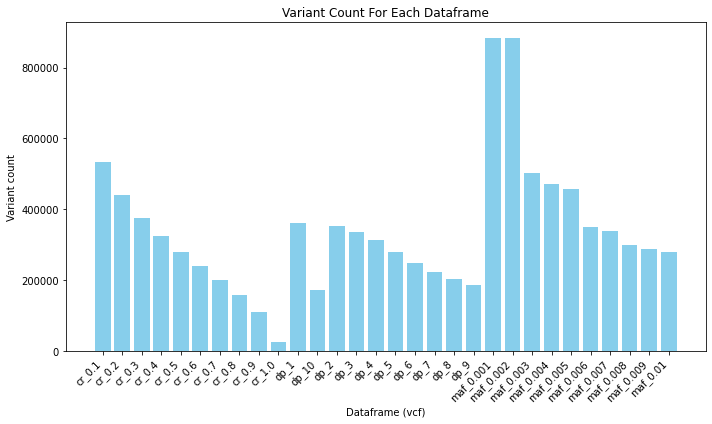

In [11]:
# Sort the dataframe names alphabetically
sorted_dataframe_names = sorted(dataframes.keys())

# Get the SNP column sizes for each dataframe in sorted order
snp_sizes_sorted = [dataframes[name]['SNP'].size for name in sorted_dataframe_names]

# Create a bar chart
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(sorted_dataframe_names, snp_sizes_sorted, color='skyblue')
plt.xlabel('Dataframe (vcf)')
plt.ylabel('Variant count')
plt.title('Variant Count For Each Dataframe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

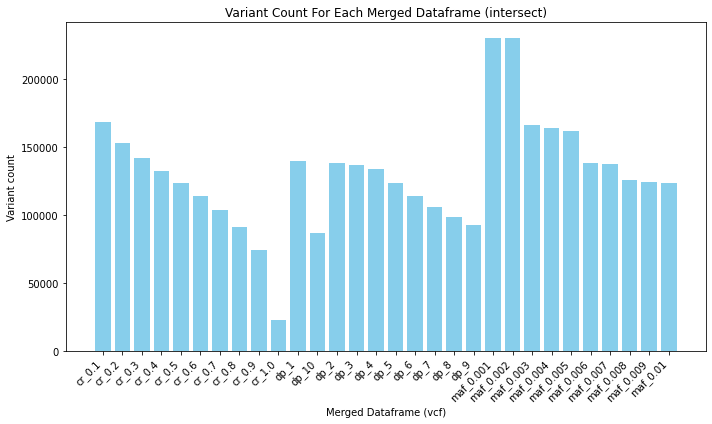

In [5]:
# Sort the keys of merged_dataframes alphabetically
sorted_merged_dataframe_names = sorted(merged_dataframes.keys())

# Get the SNP column sizes for each merged dataframe in sorted order
snp_sizes_merged_sorted = [merged_dataframes[name]['SNP'].size for name in sorted_merged_dataframe_names]

# Create a bar chart
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(sorted_merged_dataframe_names, snp_sizes_merged_sorted, color='skyblue')
plt.xlabel('Merged Dataframe (vcf)')
plt.ylabel('Variant count')
plt.title('Variant Count For Each Merged Dataframe (intersect)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

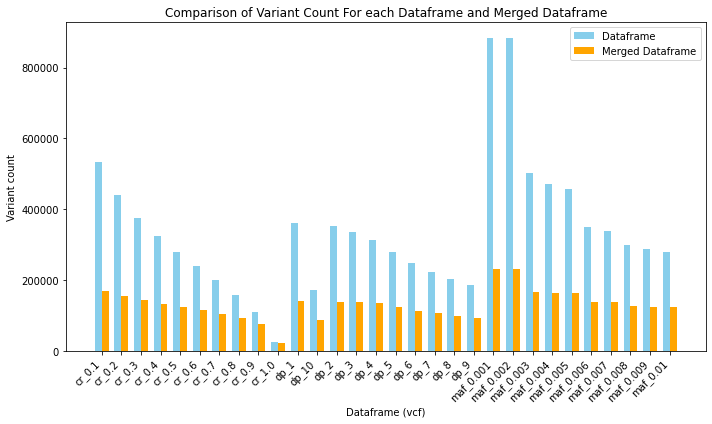

In [17]:
# Sort the dataframe names alphabetically
sorted_dataframe_names = sorted(dataframes.keys())

# Get the SNP column sizes for each dataframe in sorted order
snp_sizes_sorted = [dataframes[name]['SNP'].size for name in sorted_dataframe_names]

# Sort the keys of merged_dataframes alphabetically
sorted_merged_dataframe_names = sorted(merged_dataframes.keys())

# Get the SNP column sizes for each merged dataframe in sorted order
snp_sizes_merged_sorted = [merged_dataframes[name]['SNP'].size for name in sorted_merged_dataframe_names]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Set the width of the bars
bar_width = 0.35

# Set the x positions for the bars
x = np.arange(len(sorted_dataframe_names))

# Plot the blue bars (Dataframe sizes)
ax.bar(x, snp_sizes_sorted, color='skyblue', label='Dataframe', width=bar_width)

# Plot the orange bars (Merged Dataframe sizes) next to the blue bars
ax.bar(x + bar_width, snp_sizes_merged_sorted, color='orange', label='Merged Dataframe', width=bar_width)

# Add labels and title
ax.set_xlabel('Dataframe (vcf)')
ax.set_ylabel('Variant count')
ax.set_title('Comparison of Variant Count For each Dataframe and Merged Dataframe')

# Set the xticks and labels
ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(sorted_dataframe_names, rotation=45, ha='right')

# Add legend
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

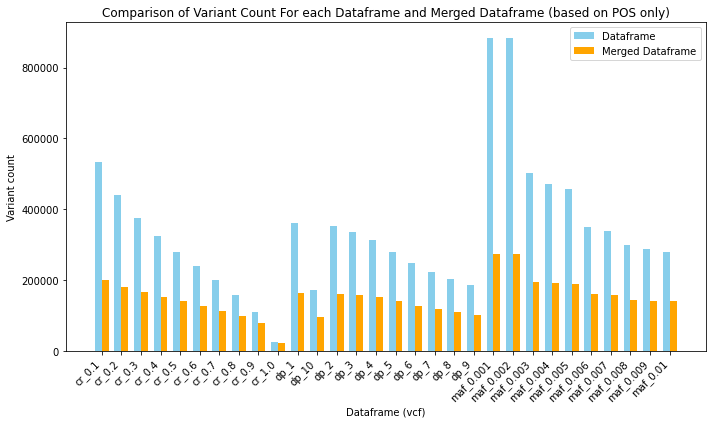

In [16]:
# Sort the dataframe names alphabetically
sorted_dataframe_names = sorted(dataframes.keys())

# Get the SNP column sizes for each dataframe in sorted order
snp_sizes_sorted = [dataframes[name]['SNP'].size for name in sorted_dataframe_names]

# Sort the keys of merged_dataframes alphabetically
sorted_merged_dataframe_names_fixed_maf = sorted(merged_dataframes_pos.keys())

# Get the SNP column sizes for each merged dataframe in sorted order
snp_sizes_merged_sorted_fixed_maf = [merged_dataframes_pos[name]['POS'].size for name in sorted_merged_dataframe_names_fixed_maf]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Set the width of the bars
bar_width = 0.35

# Set the x positions for the bars
x = np.arange(len(sorted_dataframe_names))

# Plot the blue bars (Dataframe sizes)
ax.bar(x, snp_sizes_sorted, color='skyblue', label='Dataframe', width=bar_width)

# Plot the orange bars (Merged Dataframe sizes) next to the blue bars
ax.bar(x + bar_width, snp_sizes_merged_sorted_fixed_maf, color='orange', label='Merged Dataframe', width=bar_width)

# Add labels and title
ax.set_xlabel('Dataframe (vcf)')
ax.set_ylabel('Variant count')
ax.set_title('Comparison of Variant Count For each Dataframe and Merged Dataframe (based on POS only)')

# Set the xticks and labels
ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(sorted_dataframe_names, rotation=45, ha='right')

# Add legend
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

[168822, 153471, 142300, 132724, 123382, 114086, 103489, 91301, 74494, 22628, 139812, 86970, 138203, 136569, 133629, 123382, 113731, 105628, 98474, 92404, 230469, 230469, 166022, 163807, 162301, 138509, 137601, 125522, 124126, 123382]
[200837, 180698, 165742, 152869, 140067, 127439, 113287, 97495, 77412, 22769, 163276, 94763, 160771, 157895, 153147, 140067, 127750, 117490, 108698, 101313, 273191, 273191, 194359, 190443, 187950, 159523, 157872, 143774, 141402, 140067]
[32015, 27227, 23442, 20145, 16685, 13353, 9798, 6194, 2918, 141, 23464, 7793, 22568, 21326, 19518, 16685, 14019, 11862, 10224, 8909, 42722, 42722, 28337, 26636, 25649, 21014, 20271, 18252, 17276, 16685]


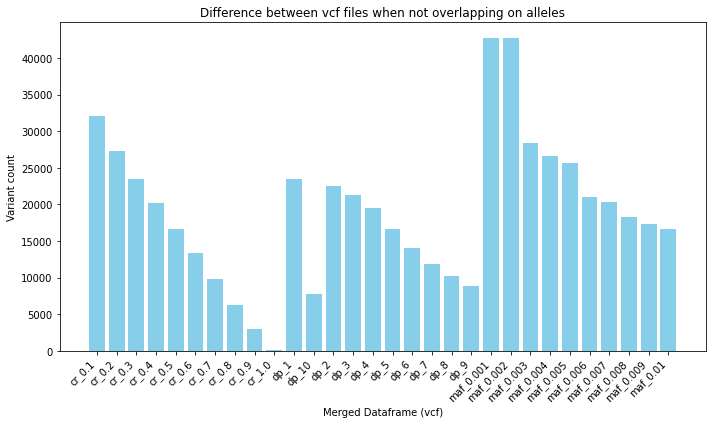

In [26]:
# # Sort the keys of merged_dataframes alphabetically
# sorted_merged_dataframe_names = sorted(merged_dataframes_pos.keys())

# # Get the SNP column sizes for each merged dataframe in sorted order
# snp_sizes_merged_sorted = [merged_dataframes_pos[name]['POS'].size for name in sorted_merged_dataframe_names]

# print(snp_sizes_sorted)


snp_sizes_merged_sorted = [merged_dataframes[name]['SNP'].size for name in sorted_merged_dataframe_names]
snp_sizes_merged_sorted_fixed_maf = [merged_dataframes_pos[name]['POS'].size for name in sorted_merged_dataframe_names_fixed_maf]
print(snp_sizes_merged_sorted)
print(snp_sizes_merged_sorted_fixed_maf)

result = [a - b for a, b in zip(snp_sizes_merged_sorted_fixed_maf, snp_sizes_merged_sorted)]

print(result)

# Create a bar chart
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(sorted_merged_dataframe_names, result, color='skyblue')
plt.xlabel('Merged Dataframe (vcf)')
plt.ylabel('Variant count')
plt.title('Difference between vcf files when not overlapping on alleles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
correlation_coefficients = {}

for name, merged_df in merged_dataframes.items():
    correlation = merged_df['MAF_MAF1'].corr(merged_df['MAF_MAF2'])
    correlation_coefficients[name] = correlation

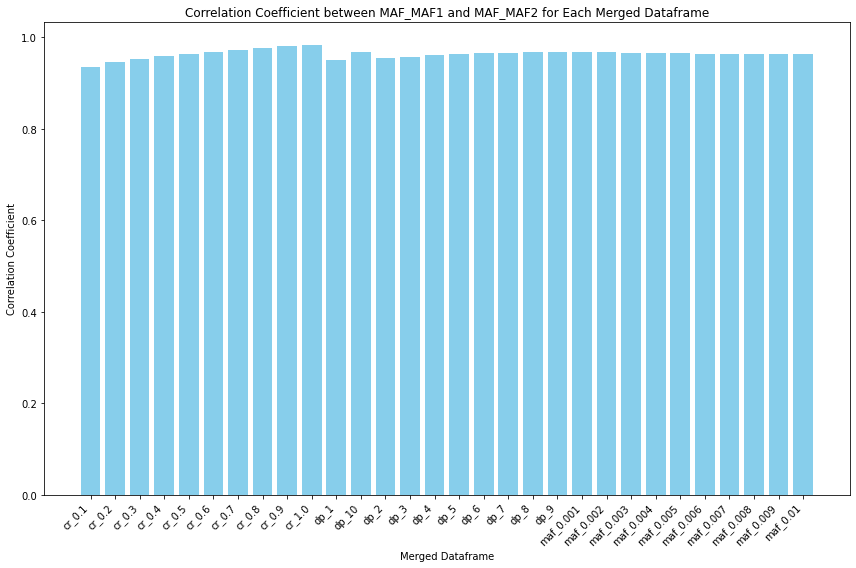

In [9]:
# Sort the keys of correlation_coefficients alphabetically
sorted_names = sorted(correlation_coefficients.keys())

# Get the sorted correlation coefficients based on sorted names
sorted_correlation_coefficients = [correlation_coefficients[name] for name in sorted_names]

# Plot the correlation coefficients
plt.figure(figsize=(12, 8), facecolor='white')
plt.bar(sorted_names, sorted_correlation_coefficients, color='skyblue')
plt.xlabel('Merged Dataframe')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient between MAF_MAF1 and MAF_MAF2 for Each Merged Dataframe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Sort the dictionary by keys (names of dataframes)
sorted_percentage_rows_remaining = {k: v for k, v in sorted(percentage_rows_remaining.items())}

# Get the sorted names and corresponding percentage values
sorted_names = list(sorted_percentage_rows_remaining.keys())
sorted_percentages = list(sorted_percentage_rows_remaining.values())

# Plot the percentage of rows remaining for each merged dataframe
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(sorted_names, sorted_percentages, color='skyblue')
plt.xlabel('Dataframe (vcf)')
plt.ylabel('Percentage of Variants Remaining')
plt.title('Percentage of Variants Remaining After Intersection For Each Datframe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'percentage_rows_remaining' is not defined

In [51]:
# Create lists to store the data
data = []
columns = ['Dataframe (VCF)', 'Original Variant ', 'After Intersect Variant Count', 'Percentage left']

# Populate the lists
for name in sorted_dataframe_names:
    original_size = dataframes[name]['SNP'].size
    merged_size = merged_dataframes[name]['SNP'].size
    percentage_merged = (merged_size / original_size) * 100
    data.append([name, original_size, merged_size, percentage_merged])

# Create DataFrame
df_summary = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df_summary

,Dataframe (VCF),Original Variant,After Intersect Variant Count,Percentage left
0,cr_0.1_output.vcf.gz-filtered_fixed_df,534580,168822,31.580306
1,cr_0.2_output.vcf.gz-filtered_fixed_df,441262,153471,34.780017
2,cr_0.3_output.vcf.gz-filtered_fixed_df,375682,142300,37.877780
3,cr_0.4_output.vcf.gz-filtered_fixed_df,324417,132724,40.911543
4,cr_0.5_output.vcf.gz-filtered_fixed_df,278104,123382,44.365417
5,cr_0.6_output.vcf.gz-filtered_fixed_df,239545,114086,47.626125
6,cr_0.7_output.vcf.gz-filtered_fixed_df,199545,103489,51.862487
7,cr_0.8_output.vcf.gz-filtered_fixed_df,156557,91301,58.318057
8,cr_0.9_output.vcf.gz-filtered_fixed_df,108716,74494,68.521653
9,cr_1.0_output.vcf.gz-filtered_fixed_df,24181,22628,93.577602
